In [26]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
 '''Ans1: The various key features in the wine data for the quality are:
         
         i. volatile acidity: It should be lesser then 0.4 on an average to maintain the quality of thw wine as 
                             per the data the wine with greater then 0.4 leads to low quality.
         ii. citric acid: The amount of citric acid as per the data should be larger then 0.35 on averge to maintain
                          quality and above 7 and 8.
        iii. chlorides: The chlorides should be lesser then 0.08 as per EDA done on the data.
        
        iv. free sulfur dioxide: It should be lesser then 14 but greater then 12 this is the limit for the quality
                                 above 7.
        v. sulphates: It should be greater then 0.7 for the quality above 7.
        
 '''

In [ ]:
'''Ans2: The missing values in the wine dataset can be handled using the imputation techniques in which we use to 
         fill the null values with the centeral tendencies of the datasets. Or we can delete the rows with the 
         null values this is vary simple to do, but it leads to the loss of data.
         There are mainly three type of imputation techniques used in the handling of null values:
             
             i. Mean value impuatation: In this technique the null values is replaced by the mean of the data calculated 
                                         through the column itself. however this technique is only valid for the numerical
                                         values with no ouliers.
            ii. Median value imputation: In this technique the null values is replaced by the median of the data calculated 
                                         by using the column. however this is only valid for  the numerical and float values.
                                         and is not valid for all type of column
            iii. Mode value imputation: In this technique the null values is replaced by the mode of the data and it is used
                                        for the categorical variables as the catgrical variables have mode and repetead values.
'''

In [ ]:
'''Ans3: The key factors which affects the performance in the exams in student data are:
            
            i. Gender: female performs well in the exams as compared to male.
            ii. lunch: Students with standard lunch perform well.
            iii. course: Students who completed course perform well in exam either its male or female.
            iv. race ethanicity: The Students of group A and group B perform bad in the exams.
            
            
        We compared the data of each of the students marks and average the marks each student got in the exams.
        then we plot a histogram which denotes the frequency of the averge marks and then the we use the mask of
        various features of the students which is used to find the relation between the marks frequency and the 
        features. The kernal density estimatior is used to sketch the distribution of the data and then this distribution
        shows us how the data is spread and using this spread we can estimate the frequency of each feature according to
        their average.
'''

In [ ]:
'''Ans4: The feature engineering involved in the students EDA are: 
            
            i. Null value check: The dataset can involved some null values and these null values need to replaced
                                 as the null values leads to the data insuffieciency.
            ii. Checking duplicacy: The duplicate values just increase the complexity of the dataset and it is of
                                    no use and create the redundency of the data to overcome this whe check if there
                                    is any duplicacy of the data and if any try to remove it.
            iii. Checking the datatype: The data type of each column is checked if there is any mismatch of the dataset
                                    datatype then the datatype is converted by using the typecasting.
            iv. dataset spliting: In data spliting the dataset is split into the two datasets so to get categorical and
                                    numerical variables in two parts.
'''

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


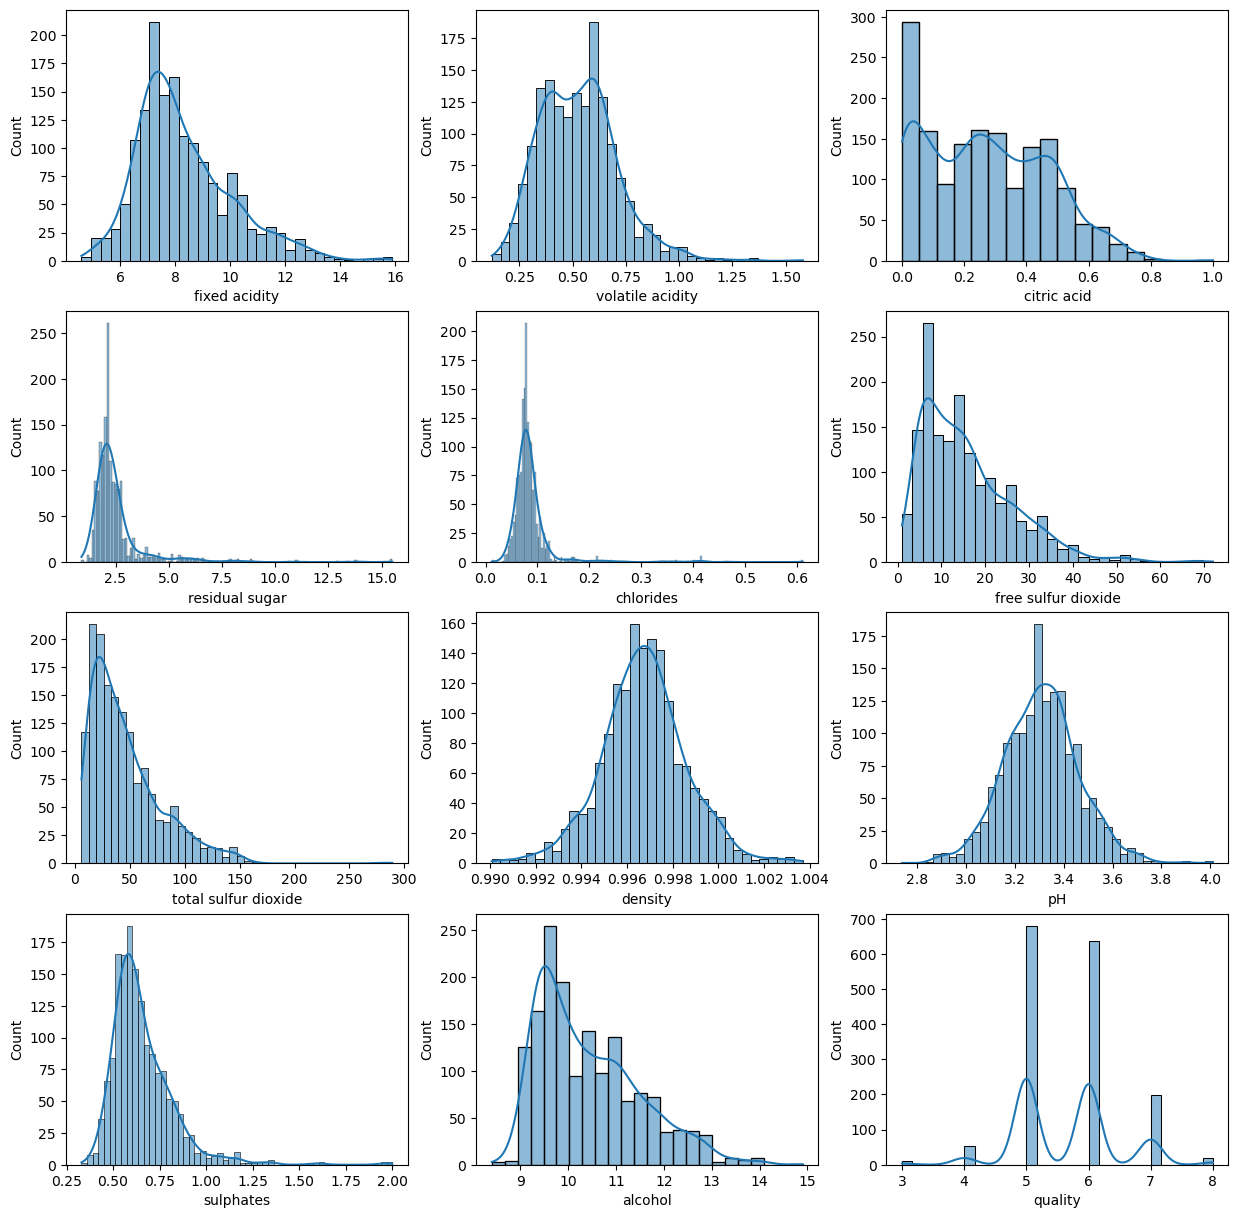

In [17]:
plt.subplots(4,3,figsize=(15,15))
for i in range(1,13):
    plt.subplot(4,3,i)
    sb.histplot(data[data.columns[i-1]],kde=True)

In [ ]:
'''Out of the above feature the following are one which doesn't follow the normal distribution.
        
        i. residual sugar
        ii.chlorides
        iii. free sulfur dioxide
        iv. total sulfur dioxide
        v. sulphates
        vi. alcohol
        
        however we can conver these data into the nomal distribution by using the standardization process which
        use the z score formula to convert the mean as 0 and standard deviation as 1.
'''

In [19]:

wine_data = data
# Separate the features from the target variable
X = wine_data.iloc[:,:-1].values
y = wine_data.iloc[:,-1].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the cumulative explained variance ratio
var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain 90% of the variance
n_components = np.argmax(var_ratio >= 0.9) + 1
print("The minimum number of principal components required to explain 90% of the variance is:", n_components)


The minimum number of principal components required to explain 90% of the variance is: 7


In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
st=StandardScaler()

In [34]:
#Ans6
temp_d=st.fit_transform(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']])

In [33]:
pca=PCA()
pca.fit(temp_d)
variance_ratio=np.cumsum(pca.explained_variance_ratio_)
n_comp=np.argmax(variance_ratio>=.90)+1
n_comp

7